In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [250]:
dnames=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','REACTOME','CGP','BIOCARTA']
bname='progeny'
atype='_abs'
rtype='_filtered'

In [251]:
delta={}
for dname1 in dnames:
    delta[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rtype,atype),
                      sep=',',header=0,index_col=0).abs().max()
        score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname1,rtype,dname2,rtype,atype),
                                     sep=',',header=0,index_col=0).abs().max()
        if dname1<dname2:
            score=score[pd.Series(score_1minus2.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_1minus2.index).apply(lambda x:x.split('*')[1]).values]
        delta[dname1]+=list(score_1minus2.values-score.values)
delta_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta:
    temp=pd.DataFrame(columns=delta_df.columns)
    temp['Delta']=delta[dname]
    temp['Data']=dname
    delta_df=pd.concat([delta_df,temp])
#fil=delta_df['Delta'].abs()<1
#delta_df=delta_df[fil]

In [252]:
delta_df.groupby('Data').mean()

,Delta
Data,
BEST_dorothea_AB,0.037695
BEST_dorothea_CD,-0.068515
BIOCARTA,-0.191214
CGP,-0.068250
KEGG,-0.058978
REACTOME,-0.080233


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

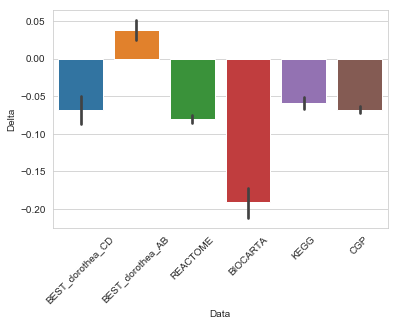

In [253]:
sns.barplot(x='Data',y='Delta',data=delta_df)
plt.xticks(rotation=45)

In [254]:
model=smf.ols('Delta ~ Data',data=delta_df).fit()

In [255]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Data,5.0,310.971613,62.194323,145.327645,1.995858e-154
Residual,153583.0,65727.278676,0.427959,NaN,NaN


In [256]:
model.pvalues

Intercept                    7.140088e-09
Data[T.BEST_dorothea_CD]     6.153342e-22
Data[T.BIOCARTA]            6.611949e-152
Data[T.CGP]                  6.771680e-50
Data[T.KEGG]                 1.052240e-35
Data[T.REACTOME]             2.719168e-61
dtype: float64

In [257]:
model.params

Intercept                   0.037695
Data[T.BEST_dorothea_CD]   -0.106210
Data[T.BIOCARTA]           -0.228909
Data[T.CGP]                -0.105944
Data[T.KEGG]               -0.096672
Data[T.REACTOME]           -0.117927
dtype: float64

In [258]:
delta={}
for dname1 in dnames:
    delta[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rtype,atype),
                      sep=',',header=0,index_col=0).abs().max()
        score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname2,rtype,dname1,rtype,atype),
                                     sep=',',header=0,index_col=0).abs().max()
        if dname2<dname1:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[1]).values]
        delta[dname1]+=list(score_2minus1.values-score.values)
delta_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta:
    temp=pd.DataFrame(columns=delta_df.columns)
    temp['Delta']=delta[dname]
    temp['Data']=dname
    delta_df=pd.concat([delta_df,temp])
#fil=delta_df['Delta'].abs()<2
#delta_df=delta_df[fil]

In [259]:
delta_df.groupby('Data').mean()

,Delta
Data,
BEST_dorothea_AB,-0.211735
BEST_dorothea_CD,0.029219
BIOCARTA,-0.024832
CGP,-0.107145
KEGG,-0.046326
REACTOME,-0.050227


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

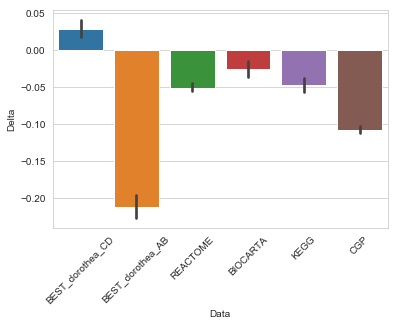

In [260]:
sns.barplot(x='Data',y='Delta',data=delta_df)
plt.xticks(rotation=45)

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

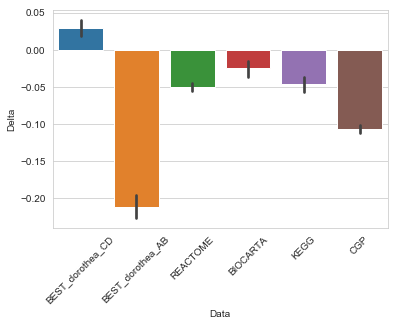

In [261]:
sns.barplot(x='Data',y='Delta',data=delta_df)
plt.xticks(rotation=45)

In [80]:
model=smf.ols('Delta ~ Data',data=delta_df).fit()

In [81]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Data,5.0,117.059136,23.411827,232.727753,6.982024e-249
Residual,291586.0,29332.818894,0.100597,NaN,NaN


In [82]:
model.pvalues

Intercept                   3.196054e-240
Data[T.BEST_dorothea_CD]    8.831564e-208
Data[T.BIOCARTA]             1.213554e-35
Data[T.CGP]                  1.242275e-36
Data[T.KEGG]                1.125337e-124
Data[T.REACTOME]             4.224193e-68
dtype: float64

In [83]:
model.params

Intercept                  -0.037324
Data[T.BEST_dorothea_CD]    0.070815
Data[T.BIOCARTA]            0.027129
Data[T.CGP]                 0.025259
Data[T.KEGG]                0.037343
Data[T.REACTOME]            0.034647
dtype: float64

In [70]:
results=pd.DataFrame(columns=['Database','Geneset','Size'])
for db in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','REACTOME','CGP','BIOCARTA']:
    data=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % db,
                sep=',',header=0,index_col=0)
    data=data['Set'].value_counts()
    results_temp=pd.DataFrame(index=range(len(data)),columns=results.columns)
    results_temp['Database']=db; results_temp['Geneset']=data.index; results_temp['Size']=data.values
    results=pd.concat([results,results_temp],0)
results['Size']=results['Size'].astype(float)

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


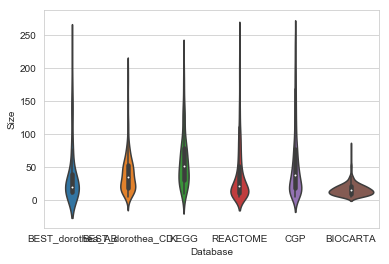

In [11]:
sns.violinplot(x='Database',y='Size',data=results)

In [12]:
data=pd.read_csv('../results/benchmark/rocaucs/gdsc/single/BEST_dorothea_AB_filtered.csv',sep=',',header=0,
                index_col=0)

In [15]:
data['AR']

Index(['AR', 'ARNTL', 'ATF1', 'ATF2', 'ATF4', 'BACH1', 'CDX2', 'CEBPA',
       'CEBPB', 'CEBPD',
       ...
       'TFDP1', 'TP63', 'TWIST1', 'USF1', 'USF2', 'VDR', 'WT1', 'YY1',
       'ZBTB33', 'ZEB1'],
      dtype='object', length=109)

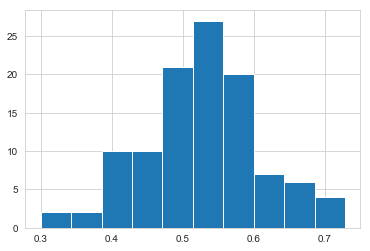

In [33]:
data.loc['VHL_mut'].sort_values().hist()

In [24]:
data.index

Index(['ACVR2A_mut', 'AKAP9_mut', 'ALK_mut', 'ANK3_mut', 'APC_mut',
       'ARFGEF1_mut', 'ARHGAP29_mut', 'ARID1A_mut', 'ARID2_mut', 'ARID4A_mut',
       'ARID4B_mut', 'ASH1L_mut', 'ASPM_mut', 'ASXL1_mut', 'ATM_mut',
       'ATR_mut', 'B2M_mut', 'BAP1_mut', 'BCOR_mut', 'BMPR2_mut', 'BPTF_mut',
       'BRAF_mut', 'BRCA1_mut', 'BRCA2_mut', 'BRWD1_mut', 'CASP8_mut',
       'CDH1_mut', 'CDKN2A_mut', 'CEP290_mut', 'CHD8_mut', 'CHD9_mut',
       'CIC_mut', 'CREBBP_mut', 'CTCF_mut', 'CTNNB1_mut', 'DNMT3A_mut',
       'EGFR_mut', 'EP300_mut', 'EZH2_mut', 'F8_mut', 'FAT1_mut', 'FAT2_mut',
       'FBXW7_mut', 'INPPL1_mut', 'KALRN_mut', 'KDM6A_mut', 'KRAS_mut',
       'LAMA2_mut', 'LPHN2_mut', 'LRPPRC_mut', 'MACF1_mut', 'MAGI2_mut',
       'MECOM_mut', 'MGA_mut', 'MLH1_mut', 'MLL_mut', 'MLL2_mut', 'MLL3_mut',
       'MLLT4_mut', 'MYH11_mut', 'MYH9_mut', 'NCOR1_mut', 'NCOR2_mut',
       'NF1_mut', 'NF2_mut', 'NOTCH1_mut', 'NRAS_mut', 'NSD1_mut', 'PBRM1_mut',
       'PIK3CA_mut', 'PIK3R1_mut', 'PTC

In [159]:
data=pd.read_csv('../results/benchmark/rocaucs//progeny/single/BEST_dorothea_AB_random_abs.csv',
                sep=',',header=0,index_col=0)

In [163]:
data['Random_611']

MAPK        0.390010
NFkB        0.687330
WNT         0.535927
Trail       0.525234
p53         0.328817
Hypoxia     0.413305
VEGF        0.491703
EGFR        0.418274
Estrogen    0.369440
PI3K        0.441244
JAK-STAT    0.650248
Androgen    0.691179
TGFb        0.525072
TNFa        0.575310
Name: Random_611, dtype: float64

In [201]:
gs=pd.read_csv('../results/genesets/single/csvs/BEST_dorothea_AB_random.csv',
              sep=',',header=0,index_col=0)

In [208]:
gs['Gene'].value_counts()/gs['Gene'].value_counts().sum()

CDKN1A      0.005871
MYC         0.005412
CCND1       0.004632
PTGS2       0.004151
BCL2        0.003990
VEGFA       0.003509
TP53        0.003371
HMOX1       0.003165
SERPINE1    0.003096
FOS         0.002935
MMP9        0.002913
TERT        0.002867
MMP2        0.002821
CYP19A1     0.002752
EGFR        0.002614
PLAUR       0.002546
CCND2       0.002523
IL12B       0.002500
ABCB1       0.002431
TNF         0.002408
IL5         0.002408
JUN         0.002408
IFNG        0.002362
CCL5        0.002316
CDH1        0.002293
IL2         0.002293
IL10        0.002247
NOS2        0.002179
ESR1        0.002179
IL6         0.002156
              ...   
NR0B1       0.000092
CXCR1       0.000092
PGK1        0.000092
BMP6        0.000092
SMC2        0.000092
JAK1        0.000092
PAX5        0.000092
NPPA        0.000092
CYP2C9      0.000092
PPP1R3C     0.000092
PURA        0.000092
UBR1        0.000092
KRT8        0.000069
ICAM3       0.000069
CASP7       0.000069
EPHB1       0.000069
HNRPA1      0